# K-Means CLustering From Scratch

##### Importing all the required Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Creating a class for K-Means

In [55]:
class KMeans:
    def __init__(self, k=2, max_iter=300, tol=1e-4, random_state=None):
        """
        Initialize the KMeans clustering model.
        
        Parameters:
            k (int): Number of clusters.
            max_iter (int): Maximum number of iterations.
            tol (float): Tolerance for convergence (minimum change in centroids).
            random_state (int, optional): Seed for random number generator.
        """
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.centroids = None
        self.clusters = None

    def _initialize_centroids(self, data):
        """
        Randomly selects k unique data points as initial centroids.
        
        Parameters:
            data (numpy.ndarray): Array of data points.
        """
        indices = np.random.choice(data.shape[0], self.k, replace=False)
        self.centroids = data[indices]

    def _assign_clusters(self, data):
        """
        Assigns each data point to the nearest centroid.
        
        Parameters:
            data (numpy.ndarray): Array of data points.
        """
        # Compute Euclidean distances between each point and each centroid
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        self.clusters = np.argmin(distances, axis=1)

    def _update_centroids(self, data):
        """
        Updates centroids as the mean of all data points assigned to each cluster.
        
        Parameters:
            data (numpy.ndarray): Array of data points.
        
        Returns:
            new_centroids (numpy.ndarray): Array of updated centroids.
        """
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            if np.any(self.clusters == i):
                new_centroids[i] = data[self.clusters == i].mean(axis=0)
            else:
                # In case a cluster gets no points, reinitialize its centroid randomly.
                new_centroids[i] = data[np.random.choice(data.shape[0])]
        return new_centroids

    def fit(self, data):
        """
        Runs the K-means clustering algorithm.
        
        Parameters:
            data (numpy.ndarray): Array of data points.
        
        Returns:
            self
        """
        self._initialize_centroids(data)
        for i in range(self.max_iter):
            self._assign_clusters(data)
            new_centroids = self._update_centroids(data)
            # Check for convergence: if centroids do not change more than the tolerance.
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                print(f"Converged after {i+1} iterations for k={self.k}")
                self.centroids = new_centroids
                break
            self.centroids = new_centroids
        else:
            print("Reached maximum iterations without full convergence.")
        return self

    def predict(self, data):
        """
        Assigns data points to the nearest cluster based on the fitted centroids.
        
        Parameters:
            data (numpy.ndarray): Array of data points.
        
        Returns:
            clusters (numpy.ndarray): Array of cluster indices for each data point.
        """
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def plot_clusters(self, data):
        """
        Plots the clustered data points along with centroids.
        
        Parameters:
            data (numpy.ndarray): Array of data points.
        """
        colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black']
        plt.figure(figsize=(6, 6))
        for i in range(self.k):
            cluster_points = data[self.clusters == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                        color=colors[i % len(colors)], label=f'Cluster {i+1}')
        # Plot centroids with a distinct marker
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1],
                    s=300, c='black', marker='X', label='Centroids')
        plt.title(f'K-Means Clustering (k = {self.k})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
        plt.show()

##### Function to Normalize Data

In [58]:
def normalize_features(df):
    return (df - df.mean()) / df.std()

##### Load the dataset

In [61]:
try:
    df = pd.read_csv('kmeans.csv')
except FileNotFoundError:
    print("File not found error.")

##### Normalize the data

In [64]:
normalized_df = normalize_features(df)
data = normalized_df.values

##### Running K-means for k=2 and k=3


Running K-means clustering for k = 2
Converged after 7 iterations for k=2


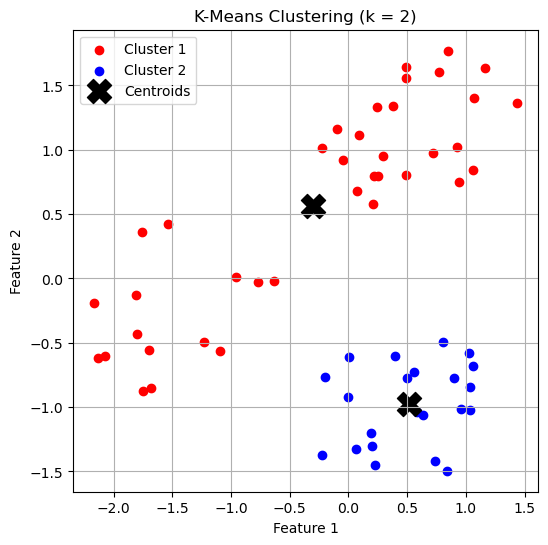

In [67]:
for k in [2]:
    print(f"\nRunning K-means clustering for k = {k}")
    kmeans_model = KMeans(k=k, max_iter=300, tol=1e-4, random_state=42)
    kmeans_model.fit(data)
    kmeans_model.plot_clusters(data)